17987.595744042 1.0113354500897772e-08 7.800739737415116e-11


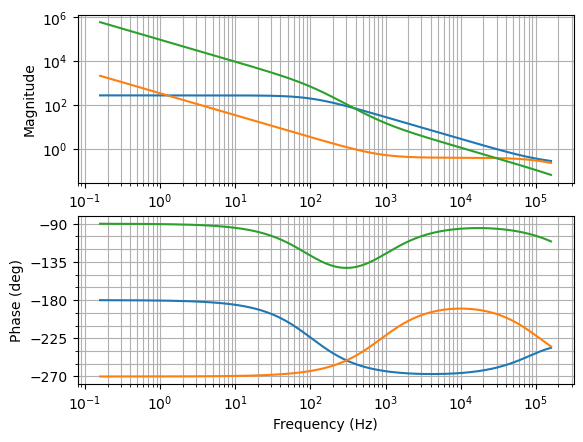

In [24]:
import control as co
import matplotlib.pyplot as plt
import numpy as np

Vin, Vd, D, T, L, R, Co, Rco = 5, 0.7, 3.3 / 5, 1 / 570e+3, 33e-6, 20, 66e-6, 20e-3
Rs, Se, gm = 1 / 12, 0, 92e-6,
R1, Rb = 25e+3, 8e+3
Vo = Vin * D
Gfc = -8
G = 10 ** (Gfc / 20)
fc = 10e+3
boost = 80
fp = (np.tan(boost * np.pi / 180) + np.sqrt((np.tan(boost * np.pi / 180) ** 2) + 1)) * fc
fz = (fc ** 2) / fp
a = np.sqrt(1 + (fc / fp) ** 2)
b = np.sqrt(1 + (fz / fc) ** 2)
R2 = fp * G * (R1 + Rb) / (fp - fz) / Rb / gm * a / b
C1 = 1 / (2 * np.pi * fz * R2)
C3 = Rb * gm / 2 / np.pi / fp / G / (Rb + R1) * b / a

A = Se * T + T * (Vin - Vo) * Rs / (2 * L)
B = T * Rs * D * (Vin - Vd) / (2 * L)
C = co.tf([A * L, Rs * (Vin - Vd)], [1])

G1 = (A * D - B) / (C * co.tf([Co, 0], [Rco * Co, 1]) + A - B + C / R)
G2 = -Rb * gm / (R1 + Rb) * co.tf([R2 * C1, 1], [R2 * C1 * C3, C1 + C3, 0])
G3 = -(Vin - Vd) / (A * D - B)

H = G1 * G2 * G3

print(R2, C1, C3)

mag, phase, omega = co.bode(G1 * G3, np.logspace(0, 6, 1000), Hz=True)
mag, phase, omega = co.bode(G2, np.logspace(0, 6, 1000), Hz=True)
mag, phase, omega = co.bode(H, np.logspace(0, 6, 1000), Hz=True)


In [5]:
import numpy as np
import math

Vo = 3.5
VGGM = 800
Vref = 0.8
Rsense = 1 / 12
Fco = 25e+3
Ro, Co = 20, 94e-6
Gain = -20 * np.log10(2 * np.pi * Rsense * Fco * Co)
Resr = 20.685e-3
PL = (np.arctan(2 * np.pi * Fco * Resr * Co) - np.arctan(2 * np.pi * Fco * Ro * Co)) * 180 / np.pi
PM = 70
PB = (PM - 90) - PL
k = np.tan((PB / 2 + 45) * np.pi / 180)
Fz1 = Fco / k
Fp1 = Fco * k
GMcomp = 12
Roa = 8e+6
Rz = 2 * np.pi * Fco * Vo * Co * Roa / GMcomp / VGGM / Vref
Cz = 1 / (2 * np.pi * Fz1 * Rz)
Cp = 1 / (2 * np.pi * Fp1 * Rz)

print(Gain, PB, PL)
print(Rz, Cz, Cp)

-1.8013296916445285 52.822048836393876 -72.82204883639388
53832.49911620009 3.516244166849238e-10 3.9773346829887743e-11
